In [48]:
import nltk


In [49]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
roose = inaugural.raw('1941-Roosevelt.txt')
kennedy = inaugural.raw('1961-Kennedy.txt')
nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\ebyeb\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


# Problem 2 - Define the problem and Perform Exploratory Data Analysis
-Problem Definition - Find the number of Character, words & sentences in all three speeches

In [3]:
roose

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [4]:
kennedy

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [5]:
nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [50]:
total_characters_kennedy = sum(len(kennedy) for speech in [kennedy])


In [51]:
print(f"The total number of charachers in Kennedy's speech is {total_characters_kennedy} characters.")

The total number of charachers in Kennedy's speech is 7618 characters.


In [52]:
total_characters_nixon = sum(len(nixon) for speech in [nixon])
print(f"The total number of charachers in Nixon's speech is {total_characters_nixon} characters.")

The total number of charachers in Nixon's speech is 9991 characters.


In [53]:
total_characters_roose = sum(len(roose) for speech in [roose])
print(f"The total number of charachers in Roose's speech is {total_characters_roose} characters.")

The total number of charachers in Roose's speech is 7571 characters.


In [54]:
total_words_kennedy = sum(len(speech.split()) for speech in [kennedy])
total_words_nixon = sum(len(speech.split()) for speech in [nixon])
total_words_roose = sum(len(speech.split()) for speech in [roose])

In [11]:
print(f"The total number of words in Roose's speech is {total_words_roose} words.")
print(f"The total number of words in Nixon's speech is {total_words_nixon} words.")
print(f"The total number of words in Kennedy's speech is {total_words_kennedy} words.")


The total number of words in Roose's speech is 1360 words.
The total number of words in Nixon's speech is 1819 words.
The total number of words in Kennedy's speech is 1390 words.


In [55]:
def count_sentences(text):
    sentences = text.split('.') + text.split('!') + text.split('?')
    return len(sentences)

In [56]:
print(f"There are {count_sentences(roose)} sentences in Roose's speech")
print(f"There are {count_sentences(nixon)} sentences in Nixon's speech")
print(f"There are {count_sentences(kennedy)} sentences in Kennedy's speech")


There are 71 sentences in Roose's speech
There are 75 sentences in Nixon's speech
There are 60 sentences in Kennedy's speech


In [57]:
import pandas as pd

data = {
    'Speech': ['President Franklin D Roosevelt', 'President John F. Kennedy', 'President Richard Nixon'],
    'Number of Characters': [7618, 9991, 7571],
    'Number of Words': [1360, 1819, 1390],
    'Number of Sentences': [71, 75, 60]
}

df = pd.DataFrame(data)
print(df)

                           Speech  Number of Characters  Number of Words  \
0  President Franklin D Roosevelt                  7618             1360   
1       President John F. Kennedy                  9991             1819   
2         President Richard Nixon                  7571             1390   

   Number of Sentences  
0                   71  
1                   75  
2                   60  


In [58]:
import matplotlib.pyplot as plt

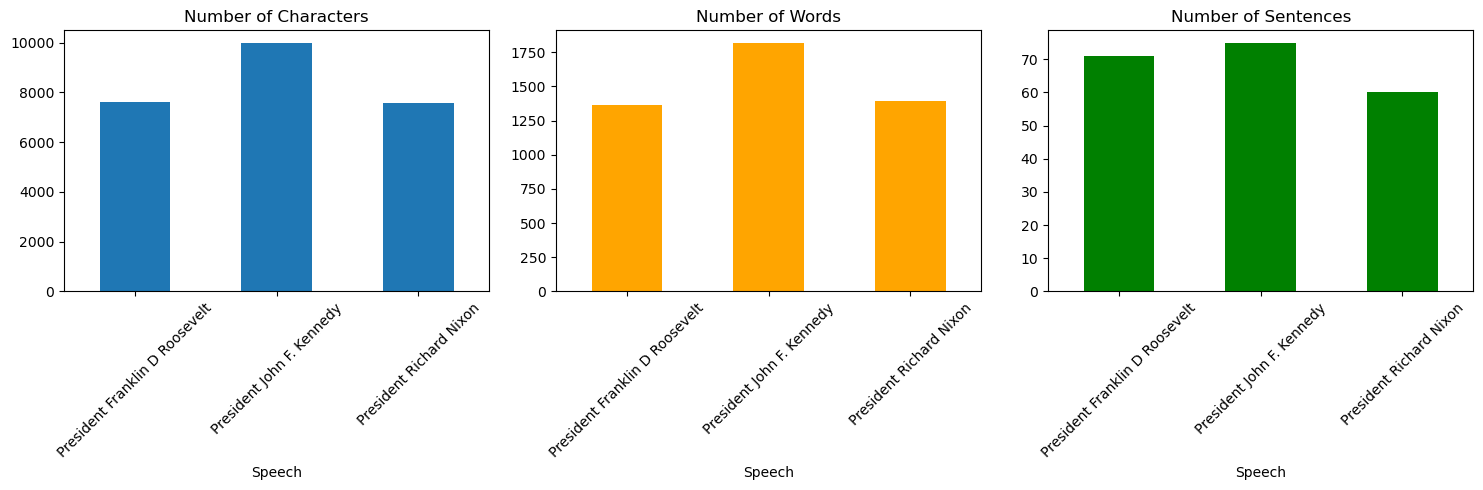

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df.plot(kind='bar', x='Speech', y='Number of Characters', ax=axes[0], rot=45, legend=False)
axes[0].set_title('Number of Characters')

df.plot(kind='bar', x='Speech', y='Number of Words', ax=axes[1], rot=45, legend=False, color='orange')
axes[1].set_title('Number of Words')

df.plot(kind='bar', x='Speech', y='Number of Sentences', ax=axes[2], rot=45, legend=False, color='green')
axes[2].set_title('Number of Sentences')

plt.tight_layout()
plt.show()

# Problem 2 - Text cleaning
- Stopword removal - Stemming - find the 3 most common words used in all three speeches

In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ebyeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ebyeb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [63]:
tokens_roose = word_tokenize(roose)
tokens_kennedy = word_tokenize(kennedy)
tokens_nixon = word_tokenize(nixon)

In [64]:

freq_dist_roose = FreqDist(tokens_roose)
freq_dist_kennedy = FreqDist(tokens_kennedy)
freq_dist_nixon = FreqDist(tokens_nixon)

In [65]:
freq_dist_roose.most_common(20)

[('the', 104),
 ('of', 81),
 (',', 77),
 ('.', 68),
 ('and', 44),
 ('to', 35),
 ('in', 30),
 ('a', 29),
 ('--', 25),
 ('is', 24),
 ('that', 22),
 ('we', 22),
 ('it', 15),
 ('our', 14),
 ('not', 13),
 ('It', 13),
 ('this', 12),
 ('all', 11),
 ('has', 10),
 ('The', 10)]

In [23]:
freq_dist_kennedy.most_common(20)

[(',', 84),
 ('the', 83),
 ('of', 65),
 ('.', 50),
 ('to', 38),
 ('and', 37),
 ('a', 29),
 ('we', 27),
 ('--', 25),
 ('in', 24),
 ('not', 23),
 ('our', 21),
 ('that', 20),
 ('for', 13),
 ('us', 12),
 ('can', 12),
 ('this', 11),
 ('both', 10),
 ('are', 9),
 ('but', 8)]

In [24]:
freq_dist_nixon.most_common(20)

[(',', 96),
 ('the', 80),
 ('of', 68),
 ('.', 65),
 ('to', 65),
 ('in', 54),
 ('and', 47),
 ('we', 38),
 ('a', 34),
 ('that', 32),
 ('for', 32),
 ('our', 31),
 ('us', 26),
 ('America', 21),
 ('as', 20),
 ('peace', 19),
 ('by', 18),
 ('will', 18),
 ('world', 17),
 ('--', 17)]

In [66]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [68]:
roose_words = roose.split()
kennedy_words = kennedy.split()
nixon_words = nixon.split()

In [69]:
roose_words_lower = [word.lower() for word in roose_words]
kennedy_words_lower = [word.lower() for word in kennedy_words]
nixon_words_lower = [word.lower() for word in nixon_words]

In [70]:
roose_words_clean = [word for word in roose_words_lower if word not in stopwords]
kennedy_words_clean = [word for word in kennedy_words_lower if word.lower() not in stopwords]
nixon_words_clean = [word for word in nixon_words_lower if word.lower() not in stopwords]

# Stemming

In [71]:
from nltk.stem import PorterStemmer


porter_stemmer = PorterStemmer()

In [72]:
roose_words_clean  = [porter_stemmer.stem(word) for word in roose_words_clean]
kennedy_words_clean  = [porter_stemmer.stem(word) for word in kennedy_words_clean]
nixon_words_clean  = [porter_stemmer.stem(word) for word in nixon_words_clean]



In [73]:
FreqDist(roose_words_clean).most_common(20)

[('--', 22),
 ('nation', 10),
 ('know', 9),
 ('us', 8),
 ('life', 6),
 ('year', 6),
 ('peopl', 5),
 ('live', 5),
 ('human', 5),
 ('measur', 5),
 ('freedom', 5),
 ('democraci', 5),
 ('spirit', 5),
 ('america', 5),
 ('speak', 5),
 ('day', 4),
 ('men', 4),
 ('govern', 4),
 ('new', 4),
 ('nation,', 4)]

In [74]:
FreqDist(kennedy_words_clean).most_common(20)

[('--', 24),
 ('let', 16),
 ('us', 11),
 ('power', 7),
 ('new', 7),
 ('pledg', 7),
 ('side', 7),
 ('nation', 6),
 ('ask', 6),
 ('shall', 5),
 ('presid', 4),
 ('fellow', 4),
 ('freedom', 4),
 ('human', 4),
 ('first', 4),
 ('alway', 4),
 ('cannot', 4),
 ('call', 4),
 ('today', 3),
 ('well', 3)]

In [75]:
FreqDist(nixon_words_clean).most_common(20)

[('us', 25),
 ('let', 22),
 ('--', 17),
 ('new', 15),
 ('peac', 11),
 ('great', 9),
 ('america', 9),
 ('world.', 8),
 ('respons', 8),
 ('nation', 8),
 ("america'", 8),
 ('make', 8),
 ('shall', 7),
 ('polici', 7),
 ('world', 7),
 ('everi', 7),
 ('better', 7),
 ('govern', 7),
 ('year', 6),
 ('abroad', 6)]

In [76]:
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation) + ['--']

In [77]:
roose_words_clean = [word for word in roose_words_clean if word.lower() not in stopwords]
kennedy_words_clean = [word for word in kennedy_words_clean if word.lower() not in stopwords]
nixon_words_clean = [word for word in nixon_words_clean if word.lower() not in stopwords]

In [78]:
roose_words_clean

['nation',
 'day',
 'inaugur',
 'sinc',
 '1789,',
 'peopl',
 'renew',
 'sens',
 'dedic',
 'unit',
 'states.',
 "washington'",
 'day',
 'task',
 'peopl',
 'creat',
 'weld',
 'togeth',
 'nation.',
 "lincoln'",
 'day',
 'task',
 'peopl',
 'preserv',
 'nation',
 'disrupt',
 'within.',
 'day',
 'task',
 'peopl',
 'save',
 'nation',
 'institut',
 'disrupt',
 'without.',
 'us',
 'come',
 'time,',
 'midst',
 'swift',
 'happenings,',
 'paus',
 'moment',
 'take',
 'stock',
 'recal',
 'place',
 'histori',
 'been,',
 'rediscov',
 'may',
 'be.',
 'not,',
 'risk',
 'real',
 'peril',
 'inaction.',
 'live',
 'nation',
 'determin',
 'count',
 'years,',
 'lifetim',
 'human',
 'spirit.',
 'life',
 'man',
 'three-scor',
 'year',
 'ten:',
 'littl',
 'more,',
 'littl',
 'less.',
 'life',
 'nation',
 'full',
 'measur',
 'live.',
 'men',
 'doubt',
 'this.',
 'men',
 'believ',
 'democracy,',
 'form',
 'govern',
 'frame',
 'life,',
 'limit',
 'measur',
 'kind',
 'mystic',
 'artifici',
 'fate',
 'that,',
 'unexp

In [79]:
FreqDist(roose_words_clean).most_common(20)

[('nation', 10),
 ('know', 9),
 ('us', 8),
 ('life', 6),
 ('year', 6),
 ('peopl', 5),
 ('live', 5),
 ('human', 5),
 ('measur', 5),
 ('freedom', 5),
 ('democraci', 5),
 ('spirit', 5),
 ('america', 5),
 ('speak', 5),
 ('day', 4),
 ('men', 4),
 ('govern', 4),
 ('new', 4),
 ('nation,', 4),
 ('bodi', 4)]

In [80]:
FreqDist(kennedy_words_clean).most_common(20)

[('let', 16),
 ('us', 11),
 ('power', 7),
 ('new', 7),
 ('pledg', 7),
 ('side', 7),
 ('nation', 6),
 ('ask', 6),
 ('shall', 5),
 ('presid', 4),
 ('fellow', 4),
 ('freedom', 4),
 ('human', 4),
 ('first', 4),
 ('alway', 4),
 ('cannot', 4),
 ('call', 4),
 ('today', 3),
 ('well', 3),
 ('begin', 3)]

In [82]:
FreqDist(nixon_words_clean).most_common(20)

[('us', 25),
 ('let', 22),
 ('new', 15),
 ('peac', 11),
 ('great', 9),
 ('america', 9),
 ('world.', 8),
 ('respons', 8),
 ('nation', 8),
 ("america'", 8),
 ('make', 8),
 ('shall', 7),
 ('polici', 7),
 ('world', 7),
 ('everi', 7),
 ('better', 7),
 ('govern', 7),
 ('year', 6),
 ('abroad', 6),
 ('time', 6)]

In [83]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

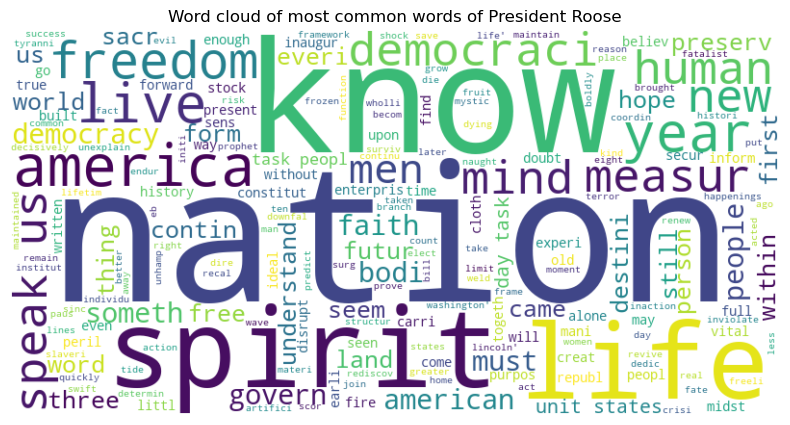

In [90]:
roose_text = ' '.join(roose_words_clean)
wordcloud_roose = WordCloud(width=800, height=400, background_color='white').generate(roose_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_roose, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most common words of President Roose')
plt.show()


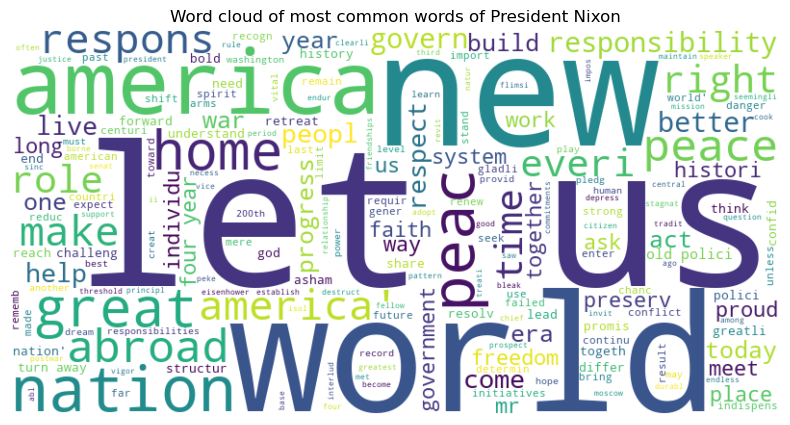

In [91]:
nixon_text = ' '.join(nixon_words_clean)
wordcloud_nixon = WordCloud(width=800, height=400, background_color='white').generate(nixon_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_nixon, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most common words of President Nixon')
plt.show()



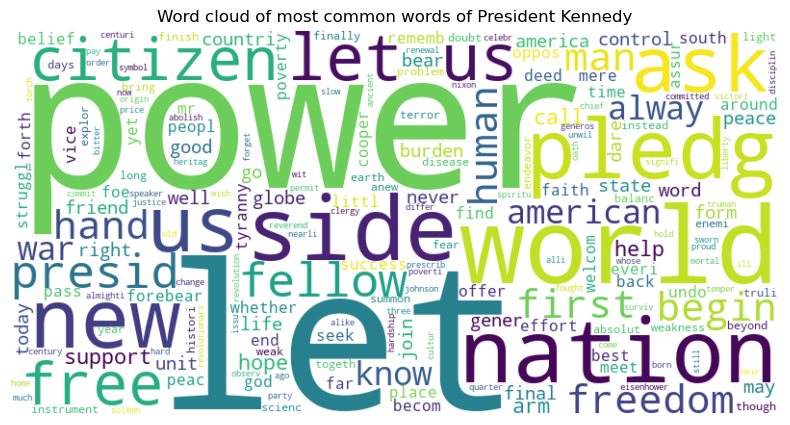

In [92]:
kennedy_text = ' '.join(kennedy_words_clean)
wordcloud_kennedy = WordCloud(width=800, height=400, background_color='white').generate(kennedy_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_kennedy, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud of most common words of President Kennedy')
plt.show()
